<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-97/blob/main/semana6/actividad-semana6-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nombre de la entrega: Actividad Semanal -- 4
* Nombre: Oscar Villa Cardenas
* Matricula: A01794052
* Materia: Ciencia y Analitica
* Profesor: Maria de la Paz Rico Fernandez
* Fecha: 2022-10-05

Importing the csv into python

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]
df.columns = headers
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Replace missing values in python

In [85]:
df.replace("?", np.nan, inplace=True)
mean = pd.to_numeric(df['normalized-losses'], errors='coerce').mean()
df["normalized-losses"].replace(np.nan, mean, inplace=True)
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          3             122.0  alfa-romero       gas        std          two   
2          1             122.0  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Correcting data types

In [86]:
df.replace("?", np.nan, inplace=True)

mean = pd.to_numeric(df['price'], errors='coerce').mean()
df["price"].replace(np.nan, mean, inplace=True)
df["price"] = df["price"].astype("int")

mean2 = pd.to_numeric(df['peak-rpm'], errors='coerce').mean()
df["peak-rpm"].replace(np.nan, mean2, inplace=True)
df["peak-rpm"] = df["peak-rpm"].astype("int")

df.tail(5)

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
200         mpfi  3.78    3.15               9.5        114      5400   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01    3.40              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   

    city-mpg highway-mpg  price  
200       23          28  16845  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  

[5 rows x 26 columns]

Normalization of the data

In [87]:

df["length"] = (df["length"]-df["length"].min()) / (df["length"].max()-df["length"].min())
df["length"].head()

0    0.413433
1    0.413433
2    0.449254
3    0.529851
4    0.529851
Name: length, dtype: float64

Binning the data

In [88]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
group_names = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          3             122.0  alfa-romero       gas        std          two   
2          1             122.0  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0        111     5000        21          27   
1  3.47    2.68                9.0        111     5000        21          27   
2  2.68    3.47                9.0        154     5000        19          26   
3  3.19    3.40               10.0        102     5500        24          30   
4  3.19    3.40                8.0        115     5500        18          22   

   price price-binned  
0  13495          Low  
1  16500          Low  
2  16500          Low  
3  13950          Low  
4  17450          Low  

[5 rows x 27 columns]

Visualizing the binned data

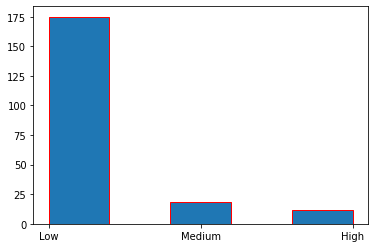

In [89]:
plt.hist(df["price-binned"], edgecolor="red", bins=5)
plt.show()

Turning categorical values into quantitative variables

In [90]:
dummies = pd.get_dummies(df["fuel-type"])
dummies.head()

diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1

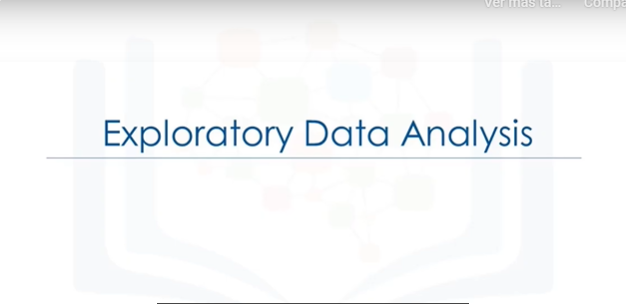

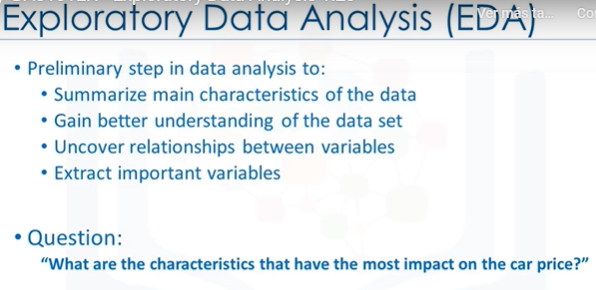

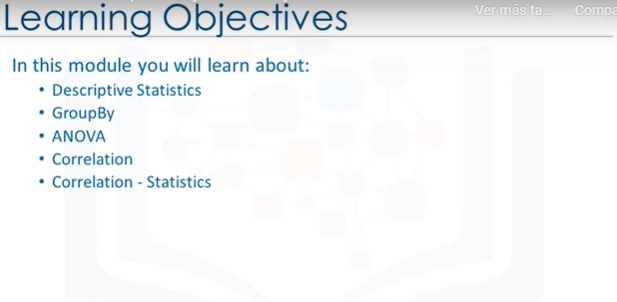

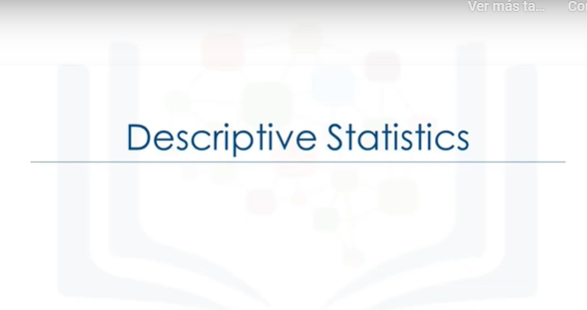

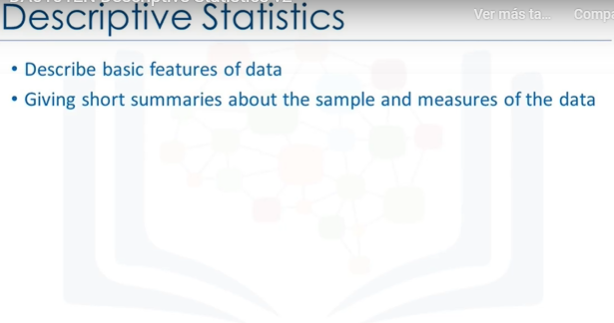

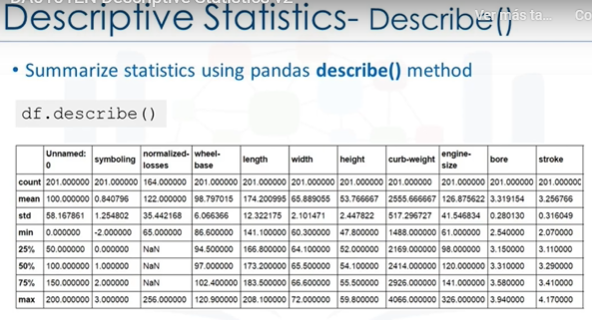

In [91]:
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585    0.491780   65.907805   53.724878   
std      1.245307    6.021776    0.184139    2.145204    2.443522   
min     -2.000000   86.600000    0.000000   60.300000   47.800000   
25%      0.000000   94.500000    0.376119   64.100000   52.000000   
50%      1.000000   97.000000    0.479104   65.500000   54.100000   
75%      2.000000  102.400000    0.626866   66.900000   55.500000   
max      3.000000  120.900000    1.000000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio     peak-rpm    city-mpg  \
count   205.000000   205.000000         205.000000   205.000000  205.000000   
mean   2555.565854   126.907317          10.142537  5125.365854   25.219512   
std     520.680204    41.642693           3.972040   476.979095    6.542142   
min    1488.000000    61.000000           7.000000  4150.000000   13.000000   
25%    2145.000000    97.000000           8.600000  4800.000000   19.000000   
50%    2414.000000   120.000000           9.000000  5200.000000   24.000000   
75%    2935.000000   141.000000           9.400000  5500.000000   30.000000   
max    4066.000000   326.000000          23.000000  6600.000000   49.000000   

       highway-mpg         price  
count   205.000000    205.000000  
mean     30.751220  13207.126829  
std       6.886443   7868.768212  
min      16.000000   5118.000000  
25%      25.000000   7788.000000  
50%      30.000000  10595.000000  
75%      34.000000  16500.000000  
max      54.000000  45400.000000

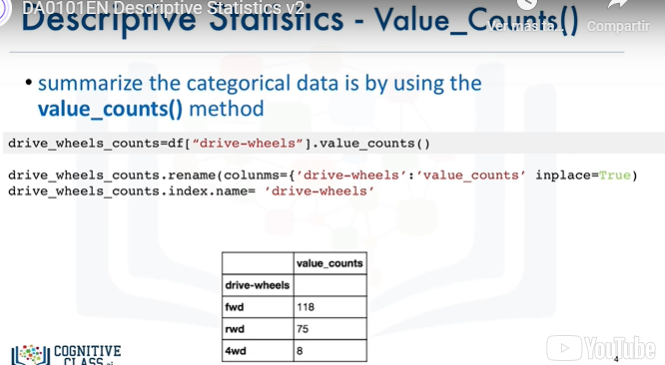

In [92]:
drive_wheels_counts = df["drive-wheels"].value_counts()
drive_wheels_counts.rename('value_counts', inplace=True)
drive_wheels_counts.index.name= 'drive-wheels'
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
Name: value_counts, dtype: int64

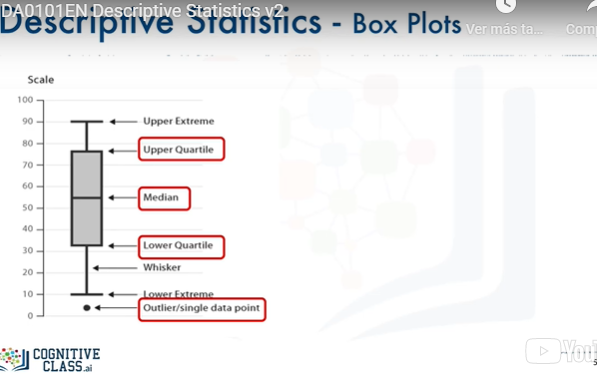

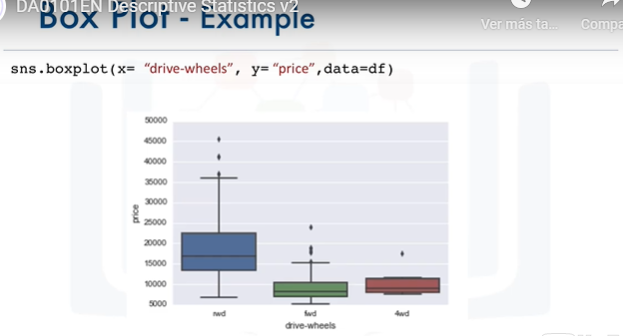

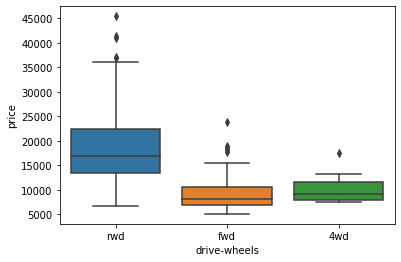

In [93]:
sns.boxplot(x="drive-wheels", y="price", data=df)

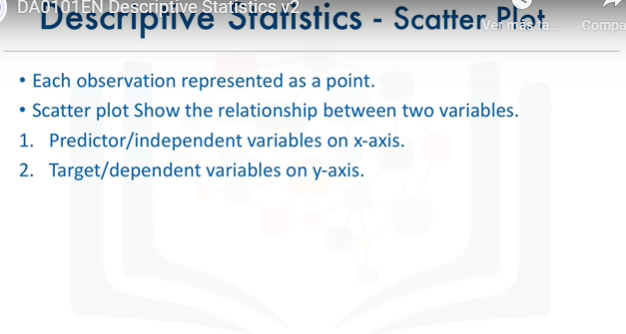

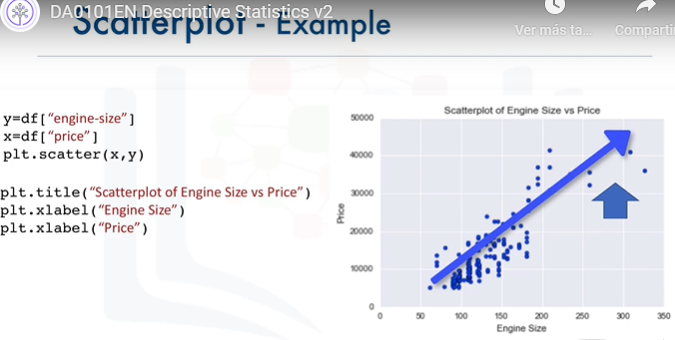

Text(0.5, 0, 'Price')

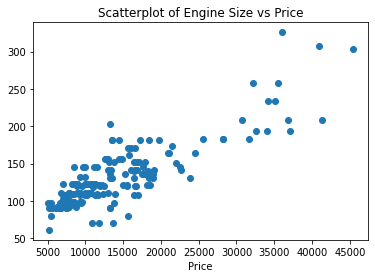

In [94]:
y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.xlabel("Price")

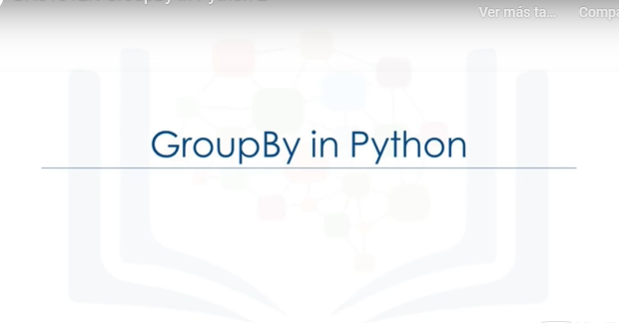

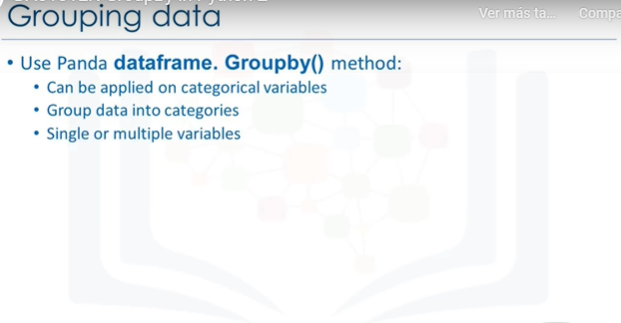

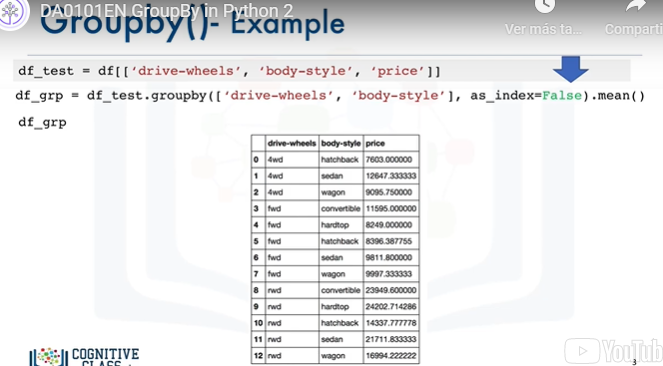

In [95]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

drive-wheels   body-style         price
0           4wd    hatchback  10405.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9930.929825
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14278.263158
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

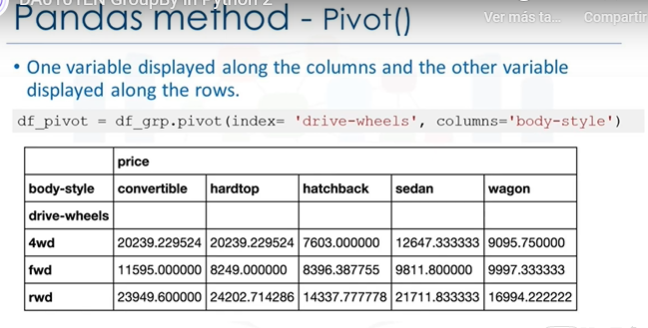

In [96]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.929825   
rwd              23949.6  24202.714286  14278.263158  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

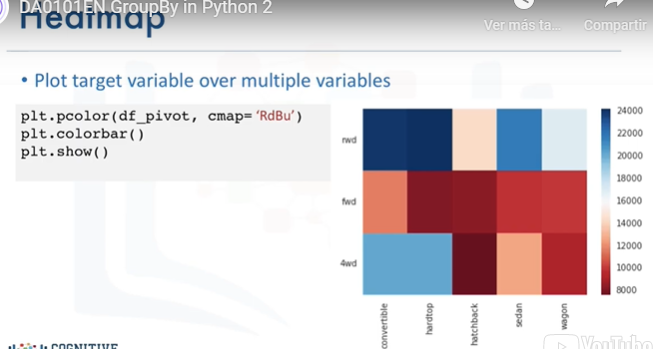

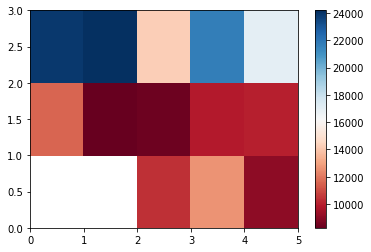

In [97]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

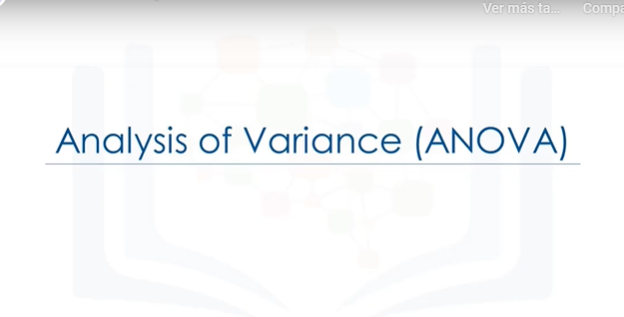

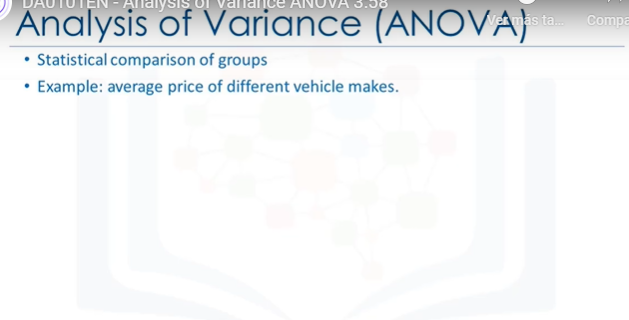

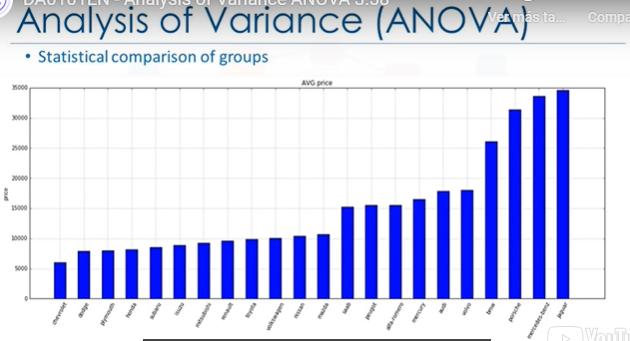

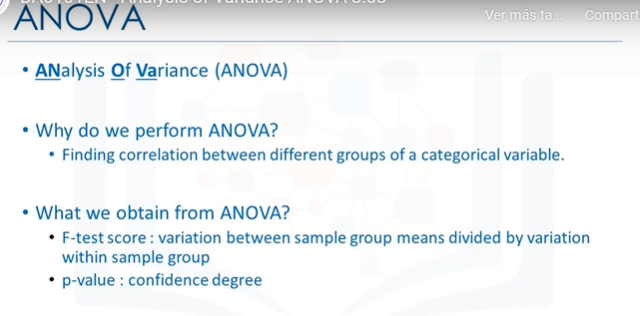

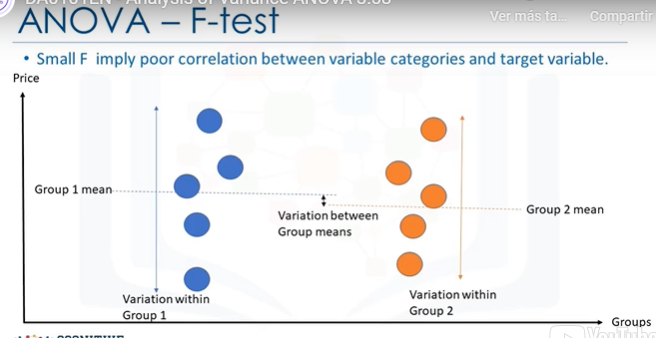

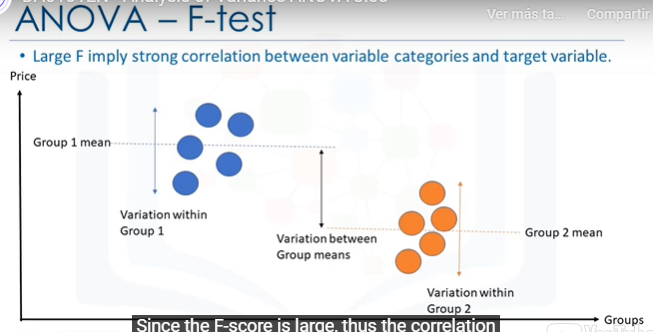

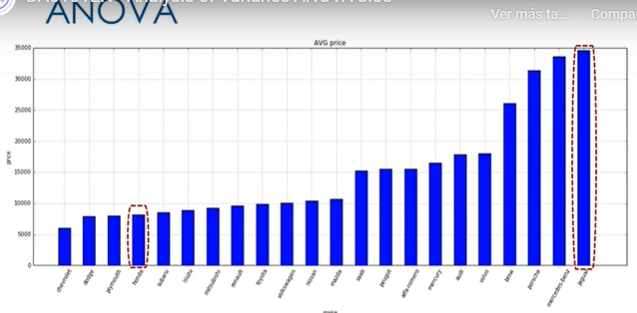

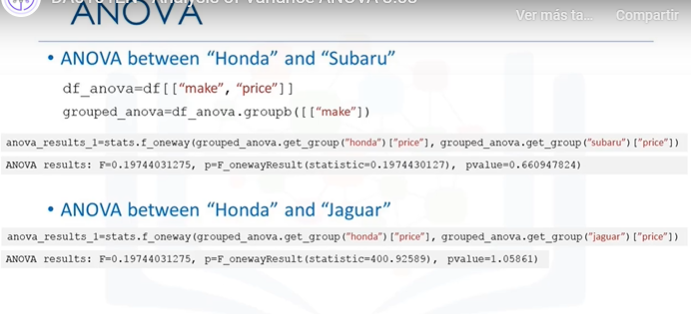

In [98]:
df_anova=df[["make", "price"]]
grouped_anova=df_anova.groupby(["make"])
anove_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
print("ANOVA results: F=0.19744031275 p="+str(anove_results_1))
anove_results_2=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
print("ANOVA results: F=0.19744031275 p="+str(anove_results_2))

ANOVA results: F=0.19744031275 p=F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
ANOVA results: F=0.19744031275 p=F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)


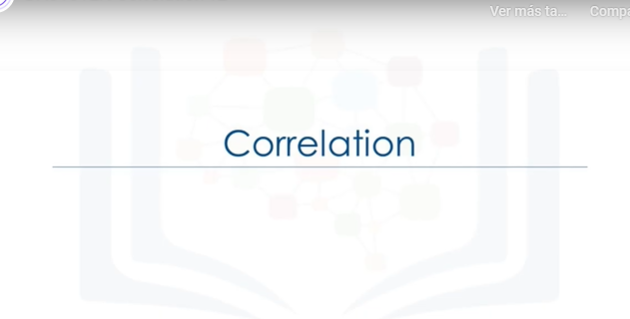

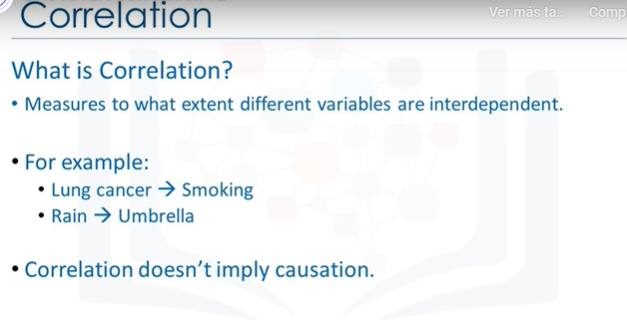

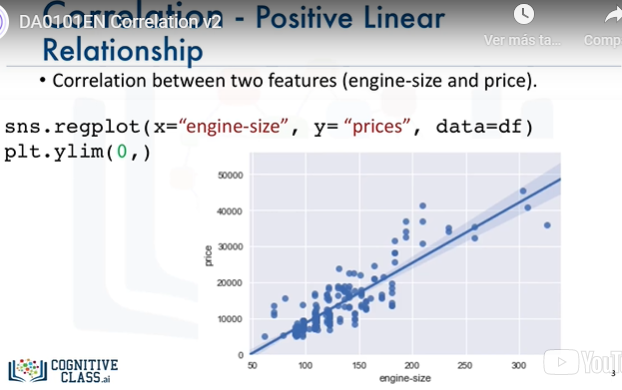

(0.0, 52456.821472444826)

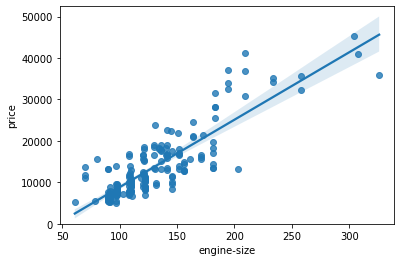

In [99]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

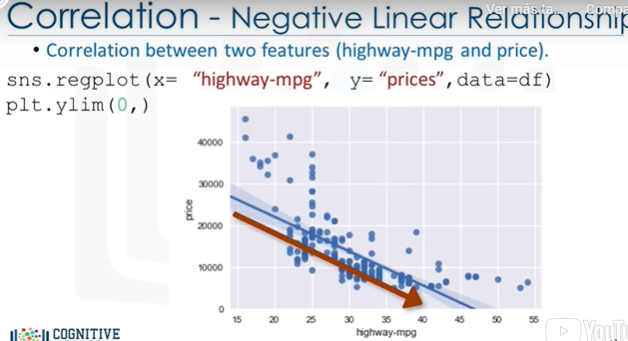

(0.0, 48140.41181752816)

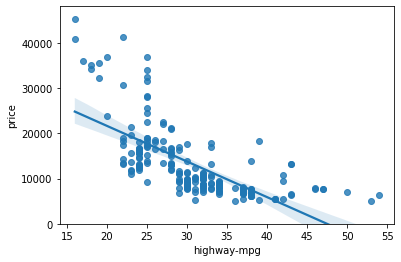

In [100]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

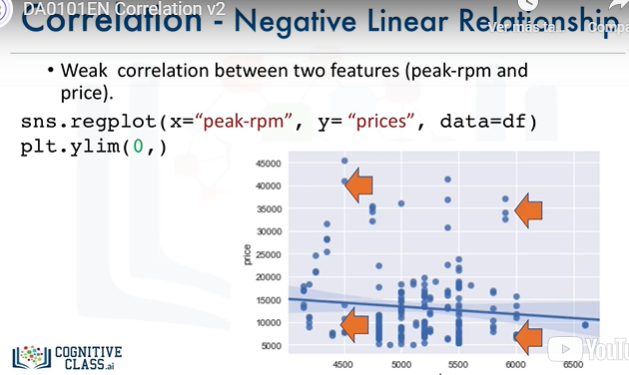

(0.0, 47414.1)

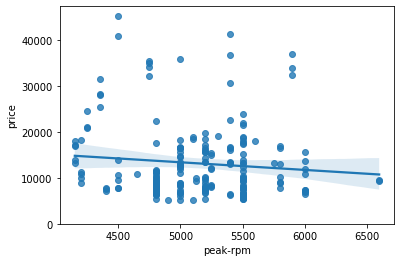

In [102]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)